Loan Prediction-> ML

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [56]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/loan_prediction.csv")

In [57]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
280,LP001910,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban,N
246,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
520,LP002689,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban,Y
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
456,LP002459,Male,Yes,0,Graduate,No,4301,0.0,118.0,360.0,1.0,Urban,Y
322,LP002054,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural,Y
347,LP002131,Male,Yes,2,Not Graduate,No,3083,2168.0,126.0,360.0,1.0,Urban,Y
235,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural,Y
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
549,LP002777,Male,Yes,0,Graduate,No,2785,2016.0,110.0,360.0,1.0,Rural,Y


In [58]:
df.shape

(614, 13)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [60]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


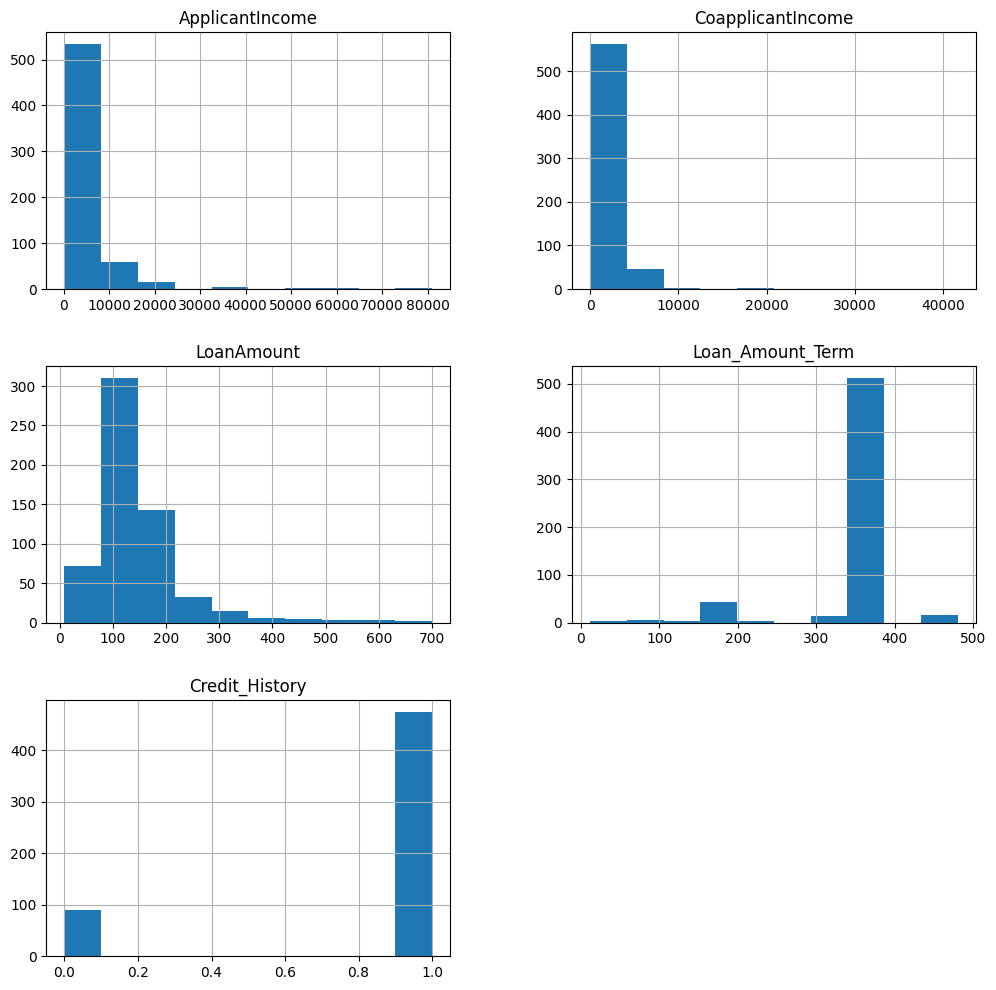

In [62]:
df.hist(figsize=(12,12))
plt.show()

In [63]:
df.skew(numeric_only=True)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

<Axes: xlabel='Loan_Status', ylabel='count'>

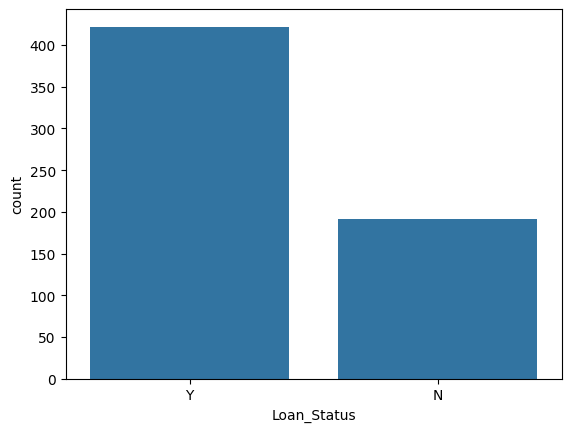

In [64]:
sns.countplot(x="Loan_Status",data=df)

In [65]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

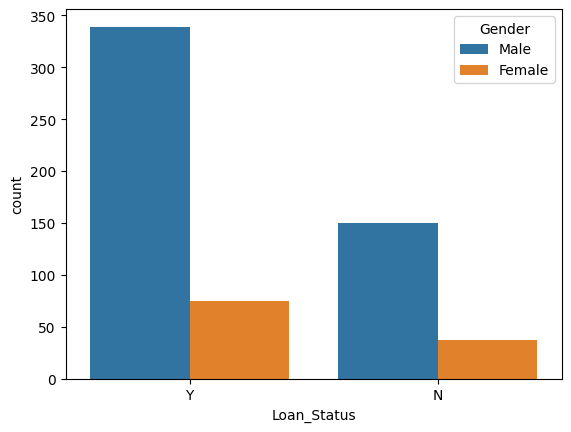

In [66]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)

In [67]:
df.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [68]:
340/489

0.6952965235173824

In [69]:
601-489

112

In [70]:
75/112

0.6696428571428571

<Axes: xlabel='ApplicantIncome'>

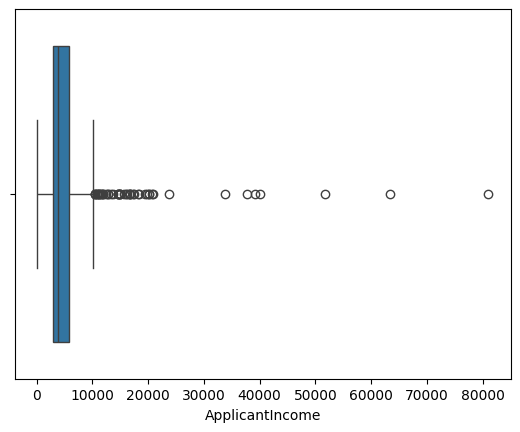

In [71]:
sns.boxplot(x="ApplicantIncome",data=df)

<Axes: xlabel='CoapplicantIncome'>

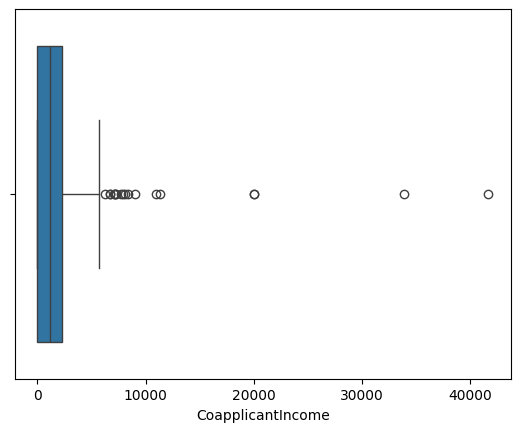

In [72]:
sns.boxplot(x="CoapplicantIncome",data=df)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

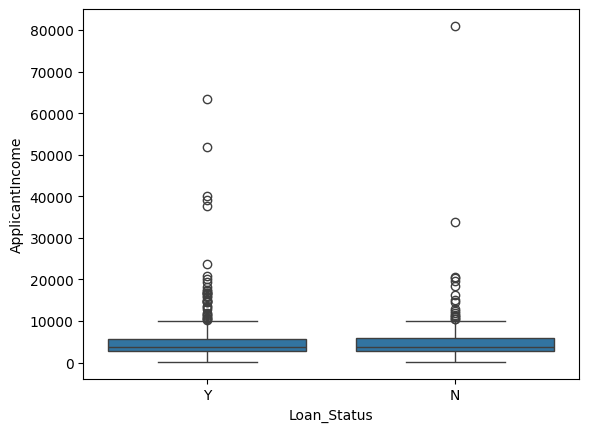

In [73]:
sns.boxplot(x="Loan_Status",y="ApplicantIncome",data=df)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

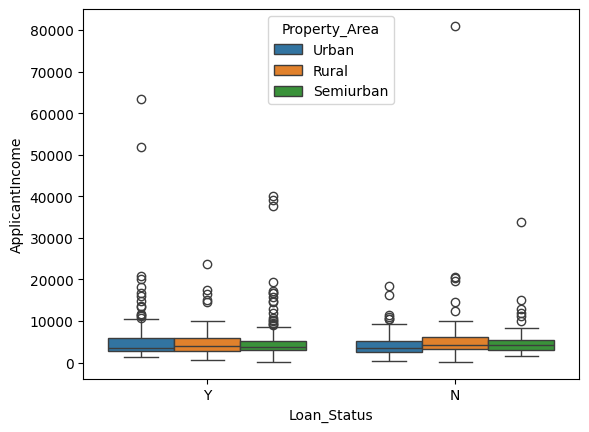

In [74]:
sns.boxplot(x="Loan_Status",y="ApplicantIncome",hue="Property_Area",data=df)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

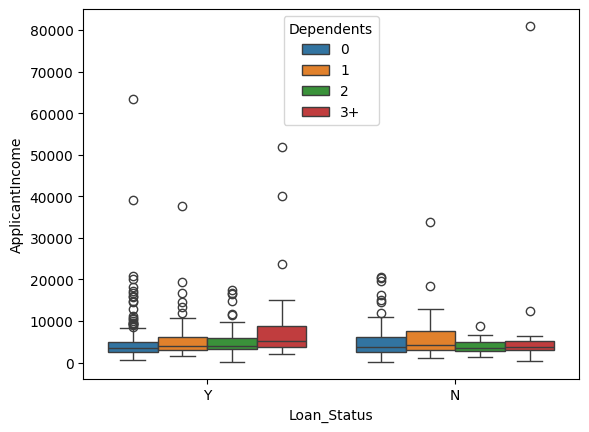

In [75]:
sns.boxplot(x="Loan_Status",y="ApplicantIncome",hue="Dependents",data=df)

In [76]:
### data preparation
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
loanamount_med=df["LoanAmount"].median()
loanamount_med

128.0

In [78]:
df["LoanAmount"]=df["LoanAmount"].fillna(loanamount_med)

In [79]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,145.752443,342.00000,0.842199
std,6109.041673,2926.248369,84.107233,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [81]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(360)

In [82]:
df["Credit_History"]=df["Credit_History"].fillna(1)

In [83]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [85]:
df["Gender"]=df["Gender"].fillna("Male")

In [86]:
df["Married"]=df["Married"].fillna("Yes")

In [87]:
df["Self_Employed"]=df["Self_Employed"].fillna("No")

In [88]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [90]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [91]:
df["Dependents"]=df["Dependents"].replace("3+",4)

In [92]:
df["Dependents"]=df["Dependents"].fillna(0)

In [93]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [94]:
df["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
4     51
0     15
Name: count, dtype: int64

In [95]:
df["Dependents"]=df["Dependents"].astype(int)

In [96]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [98]:
df.shape

(614, 13)

In [ ]:
### Drop Loan ID
df=df.drop("Loan_ID",axis=1)  # axis=1 for column

In [100]:
df.shape

(614, 12)

In [101]:
### Encoding
from sklearn.preprocessing import LabelEncoder

In [102]:
le=LabelEncoder()

In [103]:
df["Gender"]=le.fit_transform(df["Gender"])

In [105]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
526,1,Yes,0,Graduate,No,3775,0.0,110.0,360.0,1.0,Semiurban,Y
152,1,No,0,Graduate,No,9166,0.0,244.0,360.0,1.0,Urban,N
330,1,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
435,0,Yes,0,Graduate,No,10047,0.0,128.0,240.0,1.0,Semiurban,Y
383,1,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban,Y
48,0,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
402,1,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
160,1,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y
550,1,Yes,2,Graduate,Yes,6633,0.0,128.0,360.0,0.0,Rural,N
259,1,Yes,4,Not Graduate,No,4931,0.0,128.0,360.0,1.0,Semiurban,N


In [ ]:
df["Married"]=le.fit_transform(df["Married"])
df["Education"]=le.fit_transform(df["Education"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])

In [109]:
df.dtypes

Gender                 int32
Married                int64
Dependents             int32
Education              int64
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [110]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
### No missing values ### No object type

Open a new notebook and write Self Assesment 2 ->https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/AutoInsurance.csv

Customer lifetime value Prediction-> Customer Lifetime Value(DV)

insignificant column-> Customer(Dropped)

### Data Visualization

### Missing values

In [ ]:
### Shape -> 9134,24

### Drop-> Customer,Effective To Date

### Shape->  9134,22

### Unique values-> categorical columns

### describe->categ

### hist-> CLV(skew more)